# Applying machine learning alogrithm after data collection, data preprocessing

# Ridge and Lasso regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/PawanKumar/ML Notes/AQI Project/Data/Real-Data/final_data_list.csv')

In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,8.9,15.0,5.0,93.0,0.5,4.8,11.1,284.795833
1,6.6,10.0,3.0,99.0,0.6,8.1,13.0,182.187500
2,7.8,14.0,3.0,79.0,1.6,11.7,18.3,223.208333
3,13.4,29.0,7.0,55.0,2.4,11.9,22.2,200.645833
4,15.2,21.0,10.0,88.0,0.6,8.9,18.3,285.225000


In [4]:
# Check for null values
df.isna().sum()

T        0
TM       0
Tm       0
H        0
VV       0
V        0
VM       0
PM2.5    1
dtype: int64

In [5]:
# Since we do not having to much of null values hence we will rather be dropping the null.
df = df.dropna()

In [6]:
df.isna().sum()

T        0
TM       0
Tm       0
H        0
VV       0
V        0
VM       0
PM2.5    0
dtype: int64

In [7]:
dtree

In [8]:
# We check the multi-colinearaty
# sns.pairplot(df)

In [9]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM2.5
T,1.000000,0.966113,0.961494,-0.500630,0.700793,0.334792,0.299298,-0.617947
TM,0.966113,1.000000,0.882549,-0.625376,0.668075,0.287183,0.301585,-0.543582
Tm,0.961494,0.882549,1.000000,-0.292785,0.671339,0.360736,0.274944,-0.652719
H,-0.500630,-0.625376,-0.292785,1.000000,-0.383258,-0.137045,-0.252076,0.103582
VV,0.700793,0.668075,0.671339,-0.383258,1.000000,0.510676,0.414605,-0.713561
V,0.334792,0.287183,0.360736,-0.137045,0.510676,1.000000,0.680105,-0.454184
VM,0.299298,0.301585,0.274944,-0.252076,0.414605,0.680105,1.000000,-0.352206
PM2.5,-0.617947,-0.543582,-0.652719,0.103582,-0.713561,-0.454184,-0.352206,1.000000


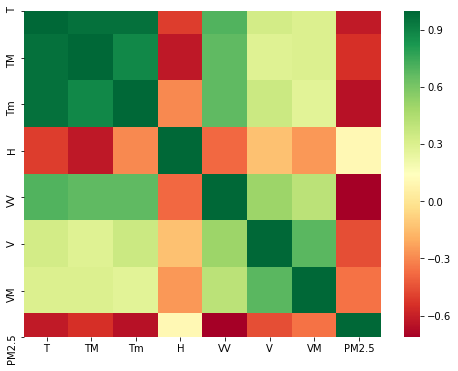

In [12]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), cmap='RdYlGn')

In [13]:
y.shape

(742,)

In [25]:
#Other way for feature selection is by Extra tree regressor ensembling technique hence 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [26]:
#This shows how much which categoreis has importance over output variable
model.feature_importances_

array([0.13827649, 0.09991059, 0.20033952, 0.08438358, 0.35597935,
       0.075873  , 0.04523747])

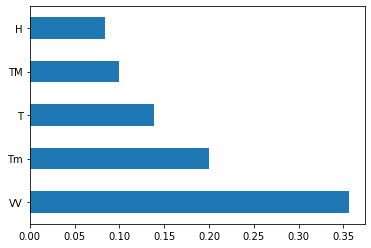

In [27]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(5).plot(kind='barh')
plt.show()

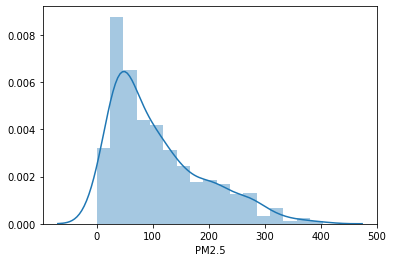

In [28]:
sns.distplot(y)
# It shows that the dependent feature is right skewed

In [29]:
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [31]:
print('Coefficient of detremination is {}'.format(metrics.r2_score(y_test, y_pred)))

Coefficient of detremination is 0.5790611370644787


In [32]:
# Checking accuracy over cross validation 
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y,scoring ='neg_mean_squared_error', cv = 5)

In [33]:
score.mean()

-2895.793146880671

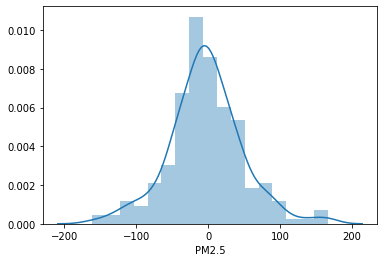

In [34]:
sns.distplot(y_test-y_pred)

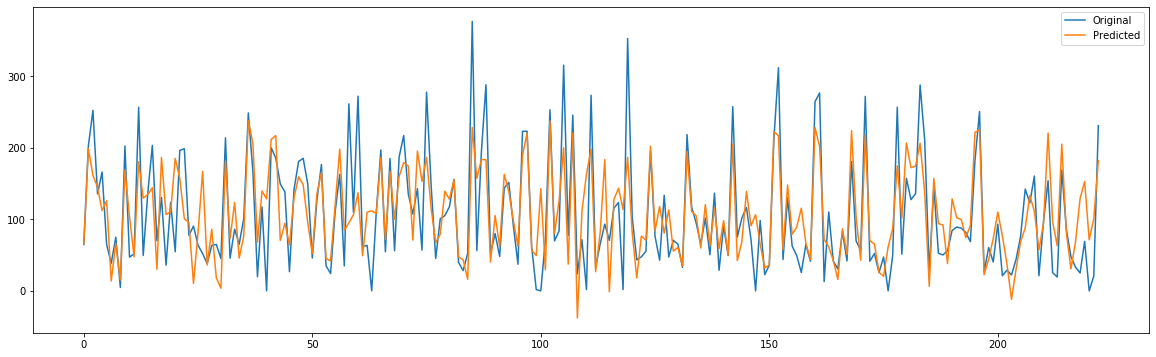

In [80]:
plt.figure(figsize = (20,6))
c=[i for i in range(len(y_test))]
plt.plot(c,y_test,label="Original")
plt.plot(c, y_pred, label = 'Predicted')
plt.legend(loc='best')

In [81]:
import pickle

In [35]:
#Applying Ridge and Lasso regression to check the accuracy over linear regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [37]:
from sklearn.model_selection import GridSearchCV

In [52]:
ridge = Ridge()
parameters = {'alpha':[1e-10, 1e-7, 1e-4, 1e-2, 1, 5, 10, 20, 40, 50, 100]}
grid_search = GridSearchCV(ridge, param_grid=parameters,cv = 5, scoring='neg_mean_squared_error')
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-07, 0.0001, 0.01, 1, 5, 10, 20, 40,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [53]:
grid_search.best_estimator_

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [54]:
grid_search.best_score_

-2889.2707810115326

# Lasso regression

In [58]:
lasso = Lasso()
parameters = {'alpha':[1e-10, 1e-7, 1e-4, 1e-2, 1, 5, 10, 20, 40, 50, 100]}
lasso_grid_search = GridSearchCV(lasso, param_grid=parameters,cv = 5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X,y)

C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 854927.6291579335, tolerance: 438.3703079031994
  positive)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 737066.9519458862, tolerance: 390.4101220476626
  positive)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835882.0914872632, tolerance: 427.357508794718
  positive)
C:\Users\PawanKumar\Anaconda1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-07, 0.0001, 0.01, 1, 5, 10, 20, 40,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [59]:
lasso_grid_search.best_params_

{'alpha': 1}

In [60]:
lasso_grid_search.best_score_

-2881.504246378864

# Model Selection

In [61]:
lass_pred = lasso_grid_search.predict(X_test)
metrics.r2_score(y_test, lass_pred)

0.5818346401755469

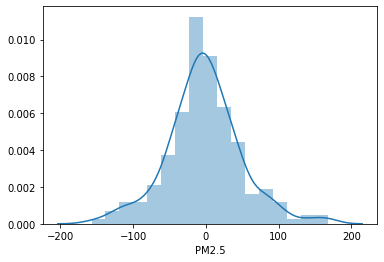

In [62]:
sns.distplot(y_test-lass_pred)

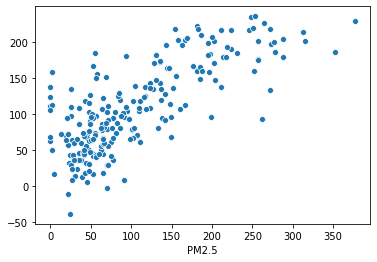

In [63]:
sns.scatterplot(y_test, lass_pred)

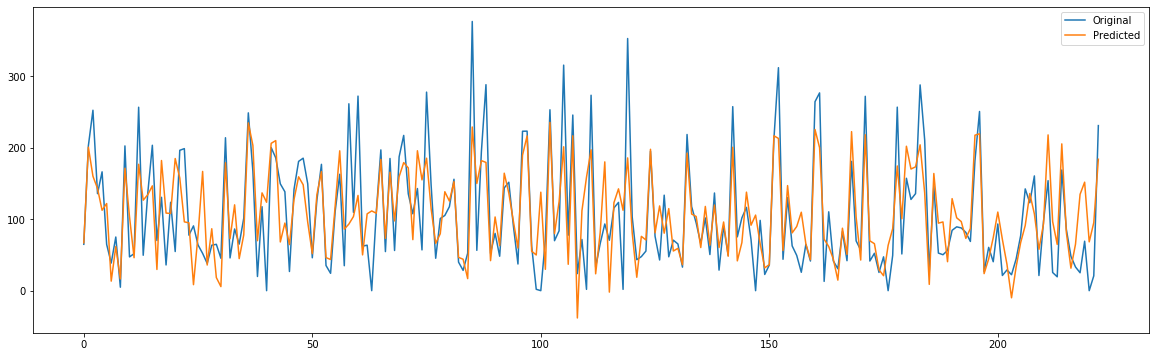

In [64]:
plt.figure(figsize = (20,6))
c=[i for i in range(len(y_test))]
plt.plot(c,y_test,label="Original")
plt.plot(c, lass_pred, label = 'Predicted')
plt.legend(loc='best')

In [65]:
import pickle

In [68]:
# For model deployment
file = open('lasso_regression_model.pkl', 'wb')
pickle.dump(lasso_grid_search, file)